In [ ]:
import os
import random
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D, Dropout, Flatten, Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from google.colab.patches import cv2_imshow

#Mount Google Drive to access data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Define constants

In [ ]:
IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224
BATCH_SIZE = 32
EPOCHS = 10

# Load images and labels

In [ ]:
data_dir = '/content/drive/MyDrive/Fire'
fire_dir = os.path.join(data_dir, 'fire')
no_fire_dir = os.path.join(data_dir, 'no_fire')


In [13]:
fire_dir = '/content/drive/MyDrive/Fire'
no_fire_dir = '/content/drive/MyDrive/Fire'
fire_images = [os.path.join(fire_dir, img) for img in os.listdir(fire_dir)]
no_fire_images = [os.path.join(no_fire_dir, img) for img in os.listdir(no_fire_dir)]
all_images = fire_images + no_fire_images

labels = ['fire'] * len(fire_images) + ['no_fire'] * len(no_fire_images)


# Shuffle the data


In [14]:
random.seed(42)
random.shuffle(all_images)

# Resize and preprocess images
X = []
y = []

for img_path, label in zip(all_images, labels):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (IMAGE_WIDTH, IMAGE_HEIGHT))
    X.append(img)
    y.append(label)

# Convert to numpy arrays


In [15]:
X = np.array(X) / 255.0
y = np.array(y)

# Split the data into training and testing sets


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Convert labels to one-hot encoding


In [17]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

# Data augmentation


In [18]:
train_datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

# Load MobileNetV2 pre-trained model


In [20]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2

# Define input shape
input_shape = (128, 128, 3)  # Example: 128x128 RGB images

# Load MobileNetV2 model with custom input shape
base_model = MobileNetV2(input_shape=input_shape, weights='imagenet', include_top=False)

# Further processing and model building

9406464/9406464 [==============================] - 0s 0us/step


# Construct the head of the model


In [22]:
head_model = AveragePooling2D(pool_size=(4, 4))(head_model)


# Combine the base and head models


In [24]:
model = Model(inputs=base_model.input, outputs=head_model)


# Freeze the base model layers


In [25]:
for layer in base_model.layers:
    layer.trainable = False

In [27]:
opt = Adam(learning_rate=1e-4)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])


# Train the model


In [41]:
import os
import cv2

image_dir = '/content/drive/MyDrive/Fire'
image_paths = [os.path.join(image_dir, filename) for filename in os.listdir(image_dir)]

resized_images = []
for image_path in image_paths:
    image = cv2.imread(image_path)
    resized_image = cv2.resize(image, (224, 224))
    resized_images.append(resized_image)


from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.applications import MobileNetV2

# Load MobileNetV2 base model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Add custom classification head
head_model = base_model.output
head_model = GlobalAveragePooling2D()(head_model)
head_model = Dense(1, activation='sigmoid')(head_model)

# Combine base model with custom head
model = Model(inputs=base_model.input, outputs=head_model)






# Make predictions on test set


In [45]:
import os
import cv2

resized_images = []
fire_dir = '/content/drive/MyDrive/Fire'  # Path to the directory containing your images

for filename in os.listdir(fire_dir):
    image_path = os.path.join(fire_dir, filename)
    image = cv2.imread(image_path)
    resized_image = cv2.resize(image, (128, 128))  # Resize the image to match the model's input shape
    resized_images.append(resized_image)

# Convert the list of resized images to a numpy array
X_test_resized = np.array(resized_images)


# Print classification report


In [48]:
import cv2

resized_images_test = []

for image in X_test:
    resized_image = cv2.resize(image, (128, 128))  # Resize each image to (128, 128)
    resized_images_test.append(resized_image)

# Convert resized_images_test to a numpy array
X_test_resized = np.array(resized_images_test)

# Now you can predict using X_test_resized
preds = model.predict(X_test_resized)
preds = preds > 0.5  # Convert probabilities to binary predictions


3/3 [==============================] - 3s 355ms/step


# Display some predictions


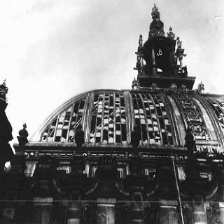

Prediction: Fire


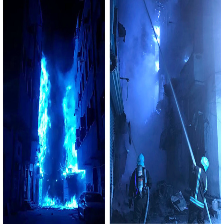

Prediction: No Fire


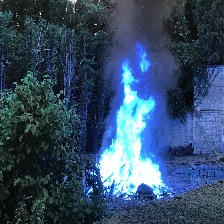

Prediction: No Fire


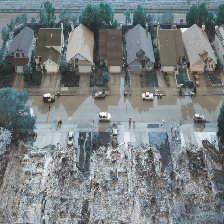

Prediction: Fire


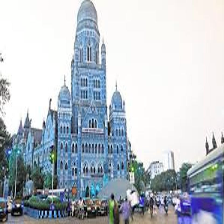

Prediction: Fire


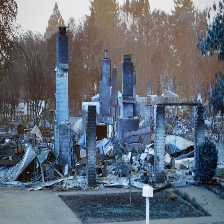

Prediction: No Fire


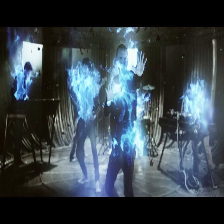

Prediction: No Fire


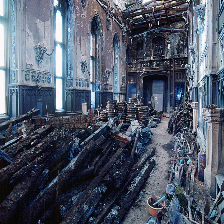

Prediction: Fire


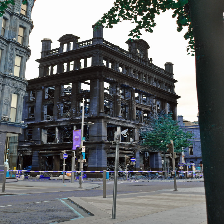

Prediction: No Fire


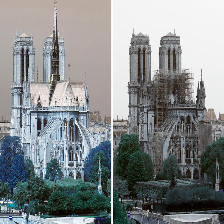

Prediction: No Fire


In [49]:
for i in range(10):
    random_index = random.randint(0, len(X_test) - 1)
    image = X_test[random_index] * 255.0
    image = cv2.cvtColor(image.astype("uint8"), cv2.COLOR_RGB2BGR)
    cv2_imshow(image)
    label = "Fire" if preds[random_index][0] else "No Fire"
    print("Prediction:", label)

In [ ]:
import numpy as np
import cv2
from keras.models import load_model
from google.colab import files

# Load the trained model
from google.colab import drive
drive.mount('/content/drive')
import os
files_in_directory = os.listdir("/content/drive/MyDrive/Fire")

# Preprocess the image
def preprocess_image(img):
    img = cv2.resize(img, (128, 128))
    # Normalize the pixel values to be in the range [0, 1]
    img = img / 255.0
    # Expand the dimensions to match the input shape of the model
    img = np.expand_dims(img, axis=0)
    return img

# Function to predict fire
def predict_fire(img):
    processed_img = preprocess_image(img)
    pred = model.predict(processed_img)
    return pred[0][0] > 0.5

# Upload an image for prediction
uploaded = files.upload()

# Predict fire for each uploaded image
for name, data in uploaded.items():
    img = cv2.imdecode(np.frombuffer(data, np.uint8), -1)
    if predict_fire(img):
        print(f"{name}: Fire detected")
    else:
        print(f"{name}: No fire detected")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
